<h1 style="font-size: 32px; color: #53BDA5;">School Size by Type of Education & Ideological Basis in the Netherlands 1990 - 2021 </h1>

Education is a fundamental aspect of modern society, providing individuals with the knowledge and skills necessary to succeed in their personal and professional lives. The educational landscape in the Netherlands has undergone significant changes in recent years, with shifts in school size, types of education offered, ideological basis of schools, and changes in student enrollment.

Our study aims to analyse these trends, and by doing so, we hope to provide a more comprehensive understanding of the evolving educational landscape and the factors that may shape it, specifically, focusing on the school size, the type of education - primary, secondary, higher level education, and ideological basis - Roman Catholic, Protestant, Public and Other Special schools between 1990 - 2021. Analyzing data over a long period can help identify long-term trends that may not be apparent from shorter-term data analysis. 

These trends may not only inform the general public, but also be useful for policy makers, educators and researchers who can make more informed decisions and identify areas for further investigation.

<h1 style="font-size: 18px; color: #53BDA5;"> Data Utilised </h1>

To achieve our goal, we used a dataset called "School size by type of education and ideological basis" retrieved from [CBS](https://opendata.cbs.nl/statline/portal.html?_la=en&_catalog=CBS&tableId=03753eng&_theme=1062), the official statistics database of the Dutch government. The dataset contains these key columns:

<ul>
  <li>TypeOfEducation: A code indicating the level of education provided (e.g. primary, secondary, etc.)</li>
  <li>IdeologicalBasisOfTheSchool: A code indicating the ideological basis of the school (e.g. public, special, roman catholic, etc.)</li>
  <li>Schoolsize: A code indicating the size of the school (e.g. Less than 101 pupils/students, 101 to 201 pupils/students, etc.)</li>
  <li>Periods: A code for the academic year</li>
  <li>SchoolsInstitutions_1: The number of schools or institutions providing the same type of education and ideological basis in the same region in a given year</li>
  <li>EnrolledPupilsStudents_2: The number of pupils or students enrolled in the school in an academic year (financed by the government)</li>
</ul>

<h1 style="font-size: 18px; color: #53BDA5;"> Data Loading </h1>


In [14]:
#import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

path = "education_statistics_dataset.csv"
# Read the data from the csv file 
try:
    df = pd.read_csv(path, delimiter=";")
    # Replace '.' with NaN values
    df = df.replace('       .', pd.NaT)
except FileNotFoundError:
    print("File not found.")

<h1 style="font-size: 20px; color:green;">Institutions by Ideological Basis and Type</h1>

In this part, we will be looking at the shares of different ideologies and types in Dutch education system in 2020;

Data includes in case of ideologies-beliefs
- Public schools, 
- Protestant schools, 
- Roman Catholic schools, 
- Other special schools. 

Schools types used in data extraction are
- Primary schools, 
- Special primary schools, 
- Secondary schools, 
- Special secondary schools, 
- Secondary vocational education (MBO), 
- Higher professional education (HBO) 
- University education (VO)

The final outcome is visualized as pie chart with percentages. 

# <h1 style="font-size: 17px; color:black;">Creating the function to sum each ideological/type of institutions</h1> 

The following functions is designed to extract the number of institutions per ideology or institution type in 2020.
It excludes the total variables from data set since it gets more complicated to work with pre-defined total numbers.

In [15]:
'''
    To calculate the total number of institutions per ideology and type. 
    Uses ideology/type codes as parameter, the codes are as follows; 
     for ideologies,
        A041914 -> Public schools
        A041916 -> Protestant schools
        A041917 -> Roman Catholic schools
        A041918 -> Other secial schools
     for types,
        A025280 -> Primary schools
        A025281 -> Special primary schools
        A042782 -> Secondary general education
        A042783 -> Special secondary education
        A041867 -> Secondary vocational education (MBO)
        A025294 -> Higher professional education (HBO)
        A025297 -> University education (VO)
'''
def total_number_of_institutions(ins_type, df):
    
    # determine if it's ideological or typical selection
    if ins_type in ["A041914", "A041916", "A041917", "A041918"]:
        selection  = 'IdeologicalBasisOfTheSchool'
    elif ins_type in ["A025280", "A025281", "A042782", "A042783", "A041867", "A025294", "A025297"]:
        selection  = 'TypeOfEducation'
    else:
        print("Selection is not appplicaple")
    
    try:    
        ps_df = df[(df[selection] == ins_type) & 
                   (df.Periods == "2020SJ00")  & 
                   (df.TypeOfEducation != "A025301") & # exclude total primary schools
                   (df.TypeOfEducation != "A025279") & # exclude total (special) primary institution
                   (~df.Schoolsize.str.contains('T00', regex=True))] # exclude other total representing values
        # Had to work with the copy of data frame to avoid 'SettingWithCopyWarning' error
        ps_df_copy = ps_df.copy()
        # Convert NA or NAT values to 0(zero) 
        ps_df_copy.loc[:,"SchoolsInstitutions_1"] = ps_df_copy["SchoolsInstitutions_1"].fillna(value=0)
        ps_df = ps_df_copy
        # Converting all values to numerics to avoid concatenation error
        ps_df["SchoolsInstitutions_1"] = ps_df["SchoolsInstitutions_1"].apply(pd.to_numeric)
        total_schools = ps_df["SchoolsInstitutions_1"].sum()
    except Exception:
        print("Something went wrong!!!")
    else:        
        return total_schools

# <h1 style="font-size: 17px; color:black;">Calculating and generating a new DataFrame for Ideological Basis</h1> 

We get the total number of institutions per ideology in 2020

In [16]:
total_public_schools = total_number_of_institutions('A041914', df)
total_protestant_schools = total_number_of_institutions('A041916', df)
total_roman_cath_schools = total_number_of_institutions('A041917', df)
total_other_special_schools = total_number_of_institutions('A041918', df)

Now that we have the values stored in, we will simply generate a new data frame and move on visualizing within that data frame.

In [17]:
# Create the new and simple data frame representing the total number of of each part
i_df = pd.DataFrame({'ideology': ['public', 'protestant', 'roman catholic', 'other special'],
                   'institutions': [total_public_schools, total_protestant_schools, total_roman_cath_schools, total_other_special_schools]})
print(i_df.to_markdown())

|    | ideology       |   institutions |
|---:|:---------------|---------------:|
|  0 | public         |           2417 |
|  1 | protestant     |           2194 |
|  2 | roman catholic |           2302 |
|  3 | other special  |           1044 |


# <h1 style="font-size: 17px; color:black;">Visualization</h1>

Create pie chart with generated DataFrame.

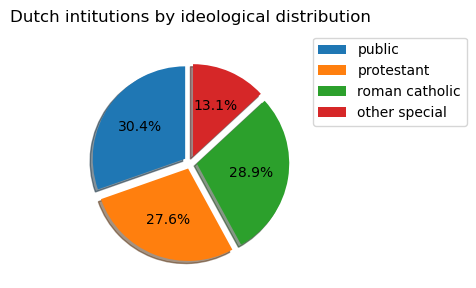

In [18]:
plt.figure(figsize=(3,3))

plt.pie(i_df['institutions'], 
        autopct='%1.1f%%', 
        startangle=90, 
        shadow=True, 
        explode=[0.07, 0.07, 0.07, 0.07])

plt.title(label='Dutch intitutions by ideological distribution', pad=18)
plt.legend(labels=i_df['ideology'], loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()

More than 30% of educational institutions in the Netherlands are public, roughly about 27% are Protestant, 28% are Catholic and 13% are other special schools. These figures suggest that the Netherlands has a diverse educational system with significant representation from various religious and non-religious affiliations.

# <h1 style="font-size: 17px; color:black;">Calculating and generating a new DataFrame for Ideological Basis</h1> 

We get the total number of institutions per type in 2020

In [19]:
total_primary_schools = total_number_of_institutions('A025280', df)
total_special_primary_schools = total_number_of_institutions('A025281', df)
total_secondary_ed = total_number_of_institutions('A042782', df)
total_special_secondary_ed = total_number_of_institutions('A042783', df)
total_vocational_ed = total_number_of_institutions('A041867', df)
total_higher_prof_ed = total_number_of_institutions('A025294', df)
total_university_ed = total_number_of_institutions('A025297', df)

Now that we have the values stored in, we will simply generate a new data frame and move on visualizing within that data frame.

In [20]:
# Create the new and simple data frame representing the total number of of each part
t_df = pd.DataFrame(
        {'type': ['primary','special primary', 'secondary','special secondary' ,'vocational education(MBO)', 'higher professional ed(HBO)', 'university ed(VO)'],
         'institutions': [total_primary_schools, total_special_primary_schools, total_secondary_ed, total_special_secondary_ed, total_vocational_ed, total_higher_prof_ed, total_university_ed]})

print(t_df.to_markdown())

|    | type                        |   institutions |
|---:|:----------------------------|---------------:|
|  0 | primary                     |          16471 |
|  1 | special primary             |            728 |
|  2 | secondary                   |           1760 |
|  3 | special secondary           |              0 |
|  4 | vocational education(MBO)   |             62 |
|  5 | higher professional ed(HBO) |             36 |
|  6 | university ed(VO)           |             21 |


# <h1 style="font-size: 17px; color:black;">Visualization</h1>

Create pie chart with generated DataFrame.

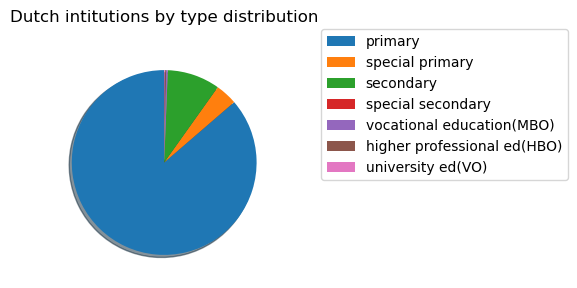

In [21]:
plt.figure(figsize=(3,3))

plt.pie(t_df['institutions'], 
        startangle=90, 
        shadow=True)

plt.title(label='Dutch intitutions by type distribution', pad=18)
plt.legend(labels=t_df['type'], loc='center left', bbox_to_anchor=(1.15, 0.75))
plt.show()

The significant majority of Dutch educational institutions are primary schools as we can see in the chart. It's followed by secondary schools with and special primary schools. Other institutions MBO, HBO and VO are taking the least figures among all educational institutions as expected.  

# <h1 style="font-size: 20px; color:green;">Amount of institutions with less than 100 over the years</h1>

In this part, we will be looking at how over time, the amount of small schools of the Netherlands changes;
Data includes the years 1990-2021. 
.
Schools types used in data extraction are
•	Primary schools,
•	Special primary schools,
•	Secondary schools,
•	Special secondary schools,
•	Secondary vocational education (MBO),
•	Higher professional education (HBO)
•	University education (VO)
The final is a line graph, which indicates at every year how many schools there are


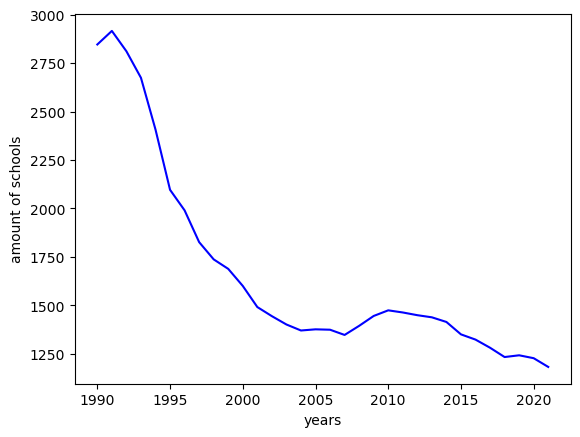

In [28]:
#List of years
xdata = [1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
total_schools_ydata = [] #starts at an empty list

periods = ['1990SJ00','1991SJ00','1992SJ00','1993SJ00','1994SJ00','1995SJ00','1996SJ00','1997SJ00','1998SJ00','1999SJ00','2000SJ00','2001SJ00','2002SJ00','2003SJ00','2004SJ00','2005SJ00','2006SJ00','2007SJ00','2008SJ00','2009SJ00','2010SJ00','2011SJ00','2012SJ00','2013SJ00','2014SJ00','2015SJ00','2016SJ00','2017SJ00','2018SJ00','2019SJ00','2020SJ00','2021SJ00']

#Getting the rows needed for the graph
for period in periods : #it repeats for every year
    df = pd.read_csv(path, sep=";")
    wanted_rows = df[ 
        (df["IdeologicalBasisOfTheSchool"]=="T001305") & #Takes the 'total of the Ideological basis, which means just al of them so religion is no variable
        (df["Schoolsize"]=='A041906') & #Takes every school witch <100 students
        (df["Periods"]==period) & #takes the year that it is at
        (df['TypeOfEducation'] != "A025301") & # exclude total primary schools
        (df['TypeOfEducation'] != "A025279") & # exclude total (special) primary institution
        (df['TypeOfEducation'] != 'T001345')] #exclude total secondary general education
    total_schools_ydata.append(wanted_rows['SchoolsInstitutions_1'].apply(pd.to_numeric).sum()) #It basically sums up al the schools in the year 'period' with <100 students

plt.plot(xdata, total_schools_ydata, c='blue', label= 'Schools <100 people over the years')
plt.xlabel('years')
plt.ylabel('amount of schools')
plt.show()

There is a overal negative change of small school in the Netherlands, only around 2005-2010 a small growth can be seen. Most of the small schools probably grew bigger or quit.

<h1 style="font-size: 20px; color: green;"> Enrollment by Ideological Basis</h1>

In this analysis, the enrollment trends across different ideological bases of schools in the Netherlands will be examined. Specifically, on schools with Catholic, Protestant, Other special, and Public ideological bases between 1990 - 2021. In this study, Catholic and Protestant refer to schools associated with the religious affiliations. '' Other special'' education as laid down in the Act on Expertise centres comprises primary and secondary education to children with leaning problems, visually handicapped and so on. Lastly, Special schools include all special schools (Catholic, Protestant and Other Special schools)

<h1 style="font-size: 17px; color: black;"> Filtering out Columns and Replacing Codes with Names </h1>

In [23]:
# Replace the values in the 'IdeologicalBasisOfTheSchool' column
df['IdeologicalBasisOfTheSchool'] = df['IdeologicalBasisOfTheSchool'].replace({'A041917': 'Catholic', 'A041915': 'Special', 'A041916': 'Protestant', 'A041918': 'Other Special', 'A041914': 'Public', 'T001305': 'Total secondary general education'})

# Filter out necessary columns
df[['IdeologicalBasisOfTheSchool', 'EnrolledPupilsStudents_2', 'Periods']]

,IdeologicalBasisOfTheSchool,EnrolledPupilsStudents_2,Periods
0,Total secondary general education,1529513,1990SJ00
1,Total secondary general education,1494392,1991SJ00
2,Total secondary general education,1501585,1992SJ00
3,Total secondary general education,1515330,1993SJ00
4,Total secondary general education,1541810,1994SJ00
...,...,...,...
19003,Other Special,.,2017SJ00
19004,Other Special,.,2018SJ00
19005,Other Special,.,2019SJ00
19006,Other Special,.,2020SJ00


The table above shows the Ideological Basis of the School, Total Enrollment (total number of enrolled pupils/students) and Periods (academic year), which is the data that will be used in this analysis. 

<h1 style="font-size: 17px; color: black;"> Analysis </h1>

In [24]:
# Convert the 'EnrolledPupilsStudents_2' column to a numeric data type, including missing NaN values
df['EnrolledPupilsStudents_2'] = pd.to_numeric(df['EnrolledPupilsStudents_2'], errors='coerce')

# Extract year from the Period column by removing SJ00 at the end of each year
df['Year'] = df['Periods'].str[:4]

# Filter the data for different ideological bases of schools 
special_schools = df[df['IdeologicalBasisOfTheSchool'] == 'Special']
catholic_schools = df[df['IdeologicalBasisOfTheSchool'] == 'Catholic']
protestant_schools = df[df['IdeologicalBasisOfTheSchool'] == 'Protestant']
other_special_schools = df[df['IdeologicalBasisOfTheSchool'] == 'Other Special']
public_schools = df[df['IdeologicalBasisOfTheSchool'] == 'Public']

# Calculate the total enrollment for each group by summing up the 'EnrolledPupilsStudents_2' column
catholic_enrollment = catholic_schools.groupby('Year')['EnrolledPupilsStudents_2'].sum()
protestant_enrollment = protestant_schools.groupby('Year')['EnrolledPupilsStudents_2'].sum()
other_special_enrollment = other_special_schools.groupby('Year')['EnrolledPupilsStudents_2'].sum()
public_enrollment = public_schools.groupby('Year')['EnrolledPupilsStudents_2'].sum()
special_enrollment = special_schools.groupby('Year')['EnrolledPupilsStudents_2'].sum()

The analysis involves several data transformations and calculations on the data. The total enrollment for each ideological basis group is calculated by summing up the 'EnrolledPupilsStudents_2' column for each year.

 <h1 style="font-size: 17px; color: black;"> Graphical Representation of Enrollment by Ideological Basis (Public vs Special) </h1>

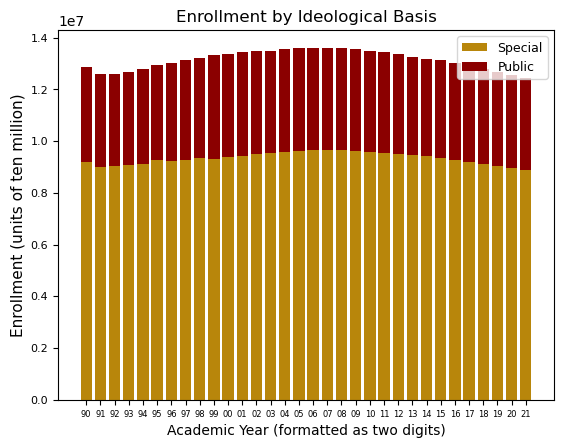

In [25]:
# Format the years as two digits only because there are too many numbers
formatted_years = [year[-2:].zfill(2) for year in catholic_enrollment.index]

# Create a stacked bar chart to compare the enrollment across different ideological bases
fig, ax = plt.subplots()
ax.bar(special_enrollment.index, special_enrollment.values, label='Special', color='darkgoldenrod')
ax.bar(public_enrollment.index, public_enrollment.values, bottom=special_enrollment.values, label='Public', color='darkred')

# Set the x-axis tick locations and labels
ax.set_xticks(public_enrollment.index)
ax.set_xticklabels(formatted_years, fontsize=6)

# Labels for the bar chart
ax.set_xlabel('Academic Year (formatted as two digits)')
ax.set_ylabel('Enrollment (units of ten million)', fontsize=11)
ax.set_title('Enrollment by Ideological Basis')
ax.legend(fontsize=9)
ax.tick_params(axis='y', labelsize=8)

# Show the bar chart
plt.show()


<li>The first graph is a stacked bar chart that compares enrollment across ideological bases in the Netherlands from 1990 to 2021. </li>
<li>The chart has bars for each academic year, whereby all the Special schools (Roman Catholic, Protestant and other Special) and the Public schools are compared.</li>
<li>The chart shows that the enrollment for the Public schools has been consistently lower than the enrollment for the Special schools, with no significant change in the trend from 1990 to 2021.</li>

 <h1 style="font-size: 17px; color: black;"> Graphical Representation of Enrollment by 
Ideological Basis (Public vs Protestant, Catholic, Other Special) </h1>

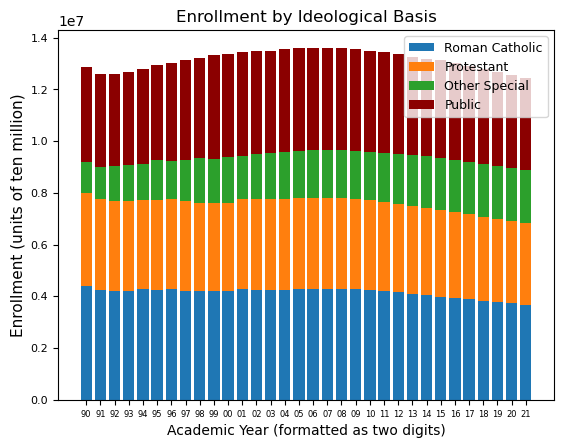

In [26]:
# Create a stacked bar chart to compare the enrollment across different ideological bases
fig, ax = plt.subplots()
ax.bar(catholic_enrollment.index, catholic_enrollment.values, label='Roman Catholic')
ax.bar(protestant_enrollment.index, protestant_enrollment.values, bottom=catholic_enrollment.values, label='Protestant')
ax.bar(other_special_enrollment.index, other_special_enrollment.values, bottom=catholic_enrollment.values+protestant_enrollment.values, label='Other Special')
ax.bar(public_enrollment.index, public_enrollment.values, bottom=catholic_enrollment.values+protestant_enrollment.values+other_special_enrollment.values, label='Public', color = 'darkred' )

# Set the x-axis tick locations and labels
ax.set_xticks(catholic_enrollment.index)
ax.set_xticklabels(formatted_years, fontsize=6)

# Labels for the bar chart
ax.set_xlabel('Academic Year (formatted as two digits)')
ax.set_ylabel('Enrollment (units of ten million)',fontsize=11)
ax.set_title('Enrollment by Ideological Basis')
ax.legend(fontsize=9)
ax.set_xticklabels(formatted_years, fontsize=6)
ax.tick_params(axis='y', labelsize=8)

# Show the bar chart
plt.show()

<li>The second graph also compares ideological bases in the Netherlands from 1990 to 2021, but now all the Special schools are broken down into their components - Roman Catholic, Protestant and Public </li>
<li>The chart shows that Roman Catholic schools have been consistent in their enrollment of students throughout the years. Other special schools have had the most noticable difference in their increase of enrollment, while Protestant schools have been steadily declining from 2006 onwards. </li>

<h1 style="font-size: 18px; color: #53BDA5;"> Conclusion </h1>

Based on the analysis of the data, it can be concluded that the Netherlands has a diverse educational system with significant representation from various religious and non-religious affiliations. The majority of educational institutions are primary schools, followed by secondary schools and special primary schools. The data also shows a decline in enrollment in Protestant schools from 2006 onwards, while other special schools have seen an increase in enrollment. There has been an overall negative trend in the number of small schools in the Netherlands, with only a small growth period observed from 2005-2010.

Firstly, the reasons behind the decline in enrollment in Protestant schools from 2006 onwards could be further investigated. This could involve exploring whether societal changes, changes in religious affiliation or other factors are responsible for this trend.

Secondly, the factors contributing to the growth in enrollment in other special schools could be studied. This could include examining the effectiveness of different educational models, teaching methods or other variables that may be attracting students to these schools.

Thirdly, the reasons for the overall negative trend in the number of small schools could be explored. This could involve investigating whether changes in educational policy, funding or other factors are responsible for this trend.

Lastly, future research could also explore the impact of the diverse educational system in the Netherlands on educational outcomes, such as student achievement, academic success and social mobility.